# Model Selection: Training, Validation and Test Set Analysis 

In [1]:
import numpy as np

import matplotlib.pyplot as plt 
import operator
from matplotlib.pyplot import figure

import pandas as pd  
#import seaborn as sns 



from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import time

boston_dataset = load_boston()

In [2]:
print(boston_dataset.keys())
print(type(boston_dataset))


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
<class 'sklearn.utils.Bunch'>


## Dataset

In [3]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Features labels

In [4]:
features = boston_dataset.feature_names
print(features)
print(len(features))

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
13


### Target values

In [5]:
target = boston_dataset.target
target_name = 'MEDV'
print(target)
print('\n')
print("The Target name is : {}".format(target_name))

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

## Pre-Processing: outliers analysis

In [6]:
boston = pd.DataFrame(boston_dataset.data, columns = features)
X_tmp= np.array(boston['RM']).reshape(-1,1)
y = np.array(target).reshape(-1,1)

In [7]:
X_inout_tmp=pd.DataFrame(np.c_[X_tmp , target], columns = ['RM', 'MEDV'])

In [8]:
Q1 = X_inout_tmp.quantile(0.25)
Q2 = X_inout_tmp.quantile(0.5) # == boston.median()
Q3 = X_inout_tmp.quantile(0.75)

print(Q1[1])
#interquartile distance
IQR = Q3 - Q1

print(IQR[0])


X_wo_tmp_iqr = X_inout_tmp[~((X_inout_tmp < (Q1 - 1.5 * IQR)) | (X_inout_tmp > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Number of non-outliers samples (IQR method) : {}".format(X_wo_tmp_iqr.shape[0]))

# save outliers
X_o_iqr = X_inout_tmp[((X_inout_tmp < (Q1- 1.5 * IQR)) | (X_inout_tmp> (Q3 + 1.5 * IQR))).any(axis=1)]


print("Number of outliers samples (IQR method) : {}".format(X_o_iqr.shape[0]))




17.025
0.7379999999999995
Number of non-outliers samples (IQR method) : 457
Number of outliers samples (IQR method) : 49


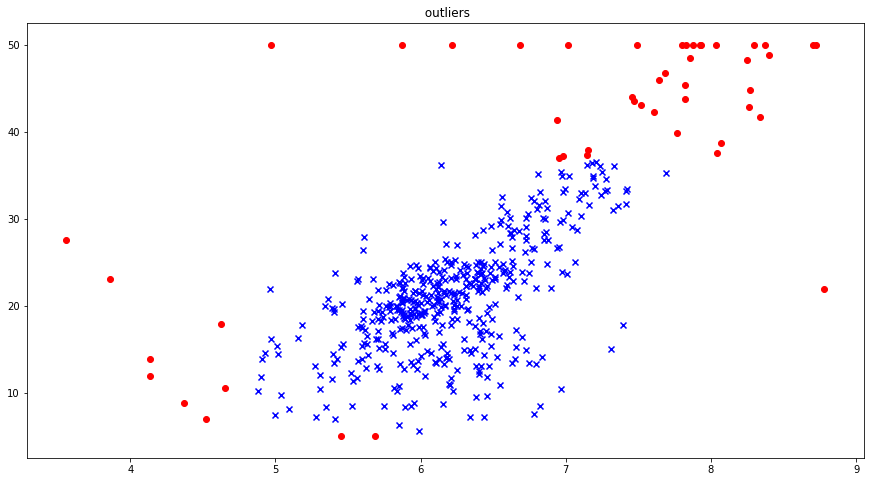

In [9]:

y_wo_iqr2= y[X_wo_tmp_iqr.index]


y_o_iqr2= y[X_o_iqr.index]
plt.figure(figsize = (15,8))
plt.scatter(X_wo_tmp_iqr['RM'], X_wo_tmp_iqr['MEDV'], marker='x' , c='b')
plt.scatter(X_o_iqr['RM'], y_o_iqr2, c = 'r')


#plt.xlim(4,9)
plt.title(" outliers")

plt.show()

In [10]:
X_wo_tmp_iqr

,RM,MEDV
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2
5,6.430,28.7
6,6.012,22.9
7,6.172,27.1
8,5.631,16.5
9,6.004,18.9


In [11]:
boston = X_wo_tmp_iqr

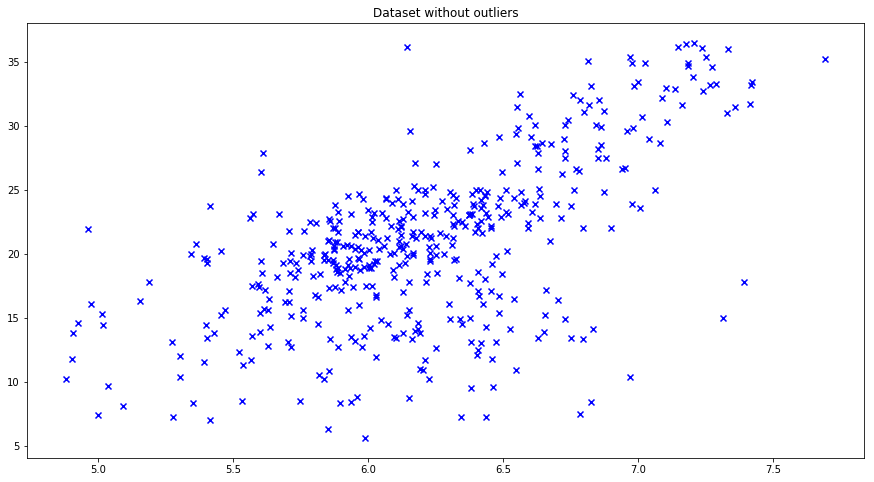

In [12]:

plt.figure(figsize = (15,8))
plt.scatter(boston['RM'],boston['MEDV'], marker='x' , c='b')



#plt.xlim(4,9)
plt.title("Dataset without outliers")

plt.show()

### Create the training set and the test set

In [13]:
from sklearn.utils import shuffle
#boston = shuffle(boston)
#boston.reindex(np.random.permutation(boston.index))
print(boston.shape)
boston = boston.sample(frac = 1, random_state = 11).reset_index(drop=True)
n_train_idx =int(boston.shape[0]*0.60)
n_validation_idx =int(boston.shape[0]*0.8)
boston_train = boston[:n_train_idx]
boston_validation = boston[n_train_idx+1:n_validation_idx]
boston_test = boston[n_validation_idx+1:]

boston_validation


(457, 2)


,RM,MEDV
275,6.482,29.1
276,6.195,21.7
277,5.344,20.0
278,6.430,28.7
279,6.127,23.9
280,6.782,7.5
281,6.459,11.8
282,5.927,19.6
283,6.030,16.6
284,6.031,19.4


### Check for NaN values

In [14]:
boston_train.isnull().sum()

RM      0
MEDV    0
dtype: int64

### Scatter Plot  

In [15]:
variable = 'RM'

X = np.c_[np.ones((boston_train.shape[0],1)), boston_train[variable]]
y = np.array(boston_train[target_name]).reshape(-1,1)

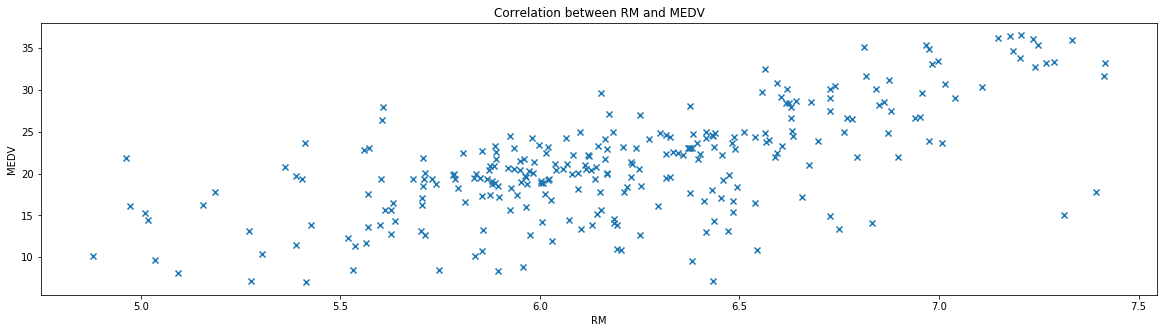

In [16]:
plt.figure(figsize=(20, 5))


plt.scatter(X[:,1], y, marker='x')
plt.title("Correlation between {} and {}".format(variable, target_name))
plt.xlabel(variable)
plt.ylabel(target_name)
plt.show()

# Linear Regression with RM

$$\large h_{\theta}(x) = \theta_0 + \theta_1 x$$

In [17]:
print(X.shape, y.shape)

(274, 2) (274, 1)


### Normal Equation (Custom)

In [18]:
def normalEquations(X, y):
    start = time.time()
    #theta = np.dot(np.dot(np.linalg.pinv(np.dot(np.transpose(X), X)), np.transpose(X)), y)
    pinv = np.linalg.pinv(X.T.dot(X))
    theta_ne = pinv.dot(X.T).dot(y)
    end = time.time()
    eta_ne = end-start
    return theta_ne.ravel(), eta_ne

## Fit the Linear Regression model

In [19]:
theta_ne, _ = normalEquations(X, y)


In [20]:
print(theta_ne)



[-29.41955736   8.135453  ]


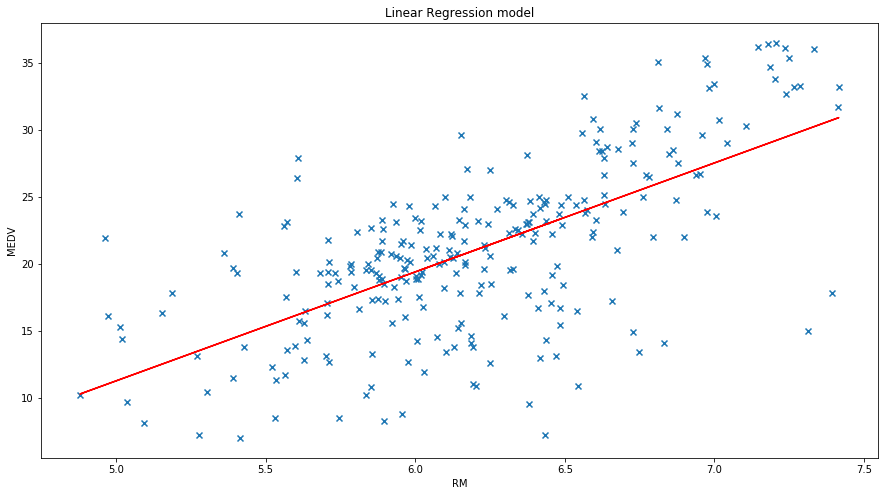

In [21]:
plt.figure(figsize = (15,8))
plt.scatter(X[:,1], y, marker='x')
plt.plot(X[:,1], X.dot(theta_ne), c = 'r')
plt.title("Linear Regression model")
plt.xlabel(variable)
plt.ylabel(target_name)
plt.show()

## Create Polynomial features

* The **polynomial_features()** function accepts a dataframe
* You have to convert the input $X$ that is a numpy array to a Pandas DataFrame

In [22]:
def polynomial_features(dataframe, degree):
    dataframe = dataframe.copy()
    variable = dataframe.columns
    for i in range(1, degree):  
        colname = variable + '**%d'%(i+1)
        dataframe[colname] = dataframe[variable]**(i+1)
    return dataframe

In [23]:

X_poly = pd.DataFrame(X[:,1], columns = [variable])

In [24]:
X_poly

,RM
0,6.023
1,6.162
2,6.545
3,6.436
4,6.595
5,6.121
6,5.536
7,5.708
8,6.402
9,5.998


## Create  Polynomial input 

In [25]:

X_poly_1 = np.c_[np.ones((X_poly.shape[0], 1)), X_poly]
X_poly_2 = np.c_[np.ones((X_poly.shape[0], 1)), polynomial_features(X_poly, 2)]
X_poly_3 = np.c_[np.ones((X_poly.shape[0], 1)), polynomial_features(X_poly, 3)]
X_poly_4 = np.c_[np.ones((X_poly.shape[0], 1)), polynomial_features(X_poly, 4)]
X_poly_5 = np.c_[np.ones((X_poly.shape[0], 1)), polynomial_features(X_poly, 5)]
X_poly_6 = np.c_[np.ones((X_poly.shape[0], 1)), polynomial_features(X_poly, 6)]
X_poly_7 = np.c_[np.ones((X_poly.shape[0], 1)), polynomial_features(X_poly, 7)]
X_poly_8 = np.c_[np.ones((X_poly.shape[0], 1)), polynomial_features(X_poly, 8)]
X_poly_9 = np.c_[np.ones((X_poly.shape[0], 1)), polynomial_features(X_poly, 9)]
X_poly_10 = np.c_[np.ones((X_poly.shape[0], 1)), polynomial_features(X_poly, 10)]




## Fit the Polynomial models using normal Equations

In [26]:
theta_ne_1, _ = normalEquations(X_poly_1, y)
theta_ne_2, _ = normalEquations(X_poly_2, y)
theta_ne_3, _ = normalEquations(X_poly_3, y)
theta_ne_4, _ = normalEquations(X_poly_4, y)
theta_ne_5, _ = normalEquations(X_poly_5, y)
theta_ne_6, _ = normalEquations(X_poly_6, y)
theta_ne_7, _ = normalEquations(X_poly_7, y)
theta_ne_8, _ = normalEquations(X_poly_8, y)
theta_ne_9, _ = normalEquations(X_poly_9, y)
theta_ne_10, _ = normalEquations(X_poly_10, y)

X_poly_1_o = X_poly_1[np.argsort(X_poly_1[:, 1])]
X_poly_2_o = X_poly_2[np.argsort(X_poly_2[:, 1])]
X_poly_3_o = X_poly_3[np.argsort(X_poly_3[:, 1])]
X_poly_4_o = X_poly_4[np.argsort(X_poly_4[:, 1])]
X_poly_5_o = X_poly_5[np.argsort(X_poly_5[:, 1])]
X_poly_6_o = X_poly_6[np.argsort(X_poly_6[:, 1])]
X_poly_7_o = X_poly_7[np.argsort(X_poly_7[:, 1])]
X_poly_8_o = X_poly_8[np.argsort(X_poly_8[:, 1])]
X_poly_9_o = X_poly_9[np.argsort(X_poly_9[:, 1])]
X_poly_10_o = X_poly_10[np.argsort(X_poly_10[:, 1])]


## Models Comparison

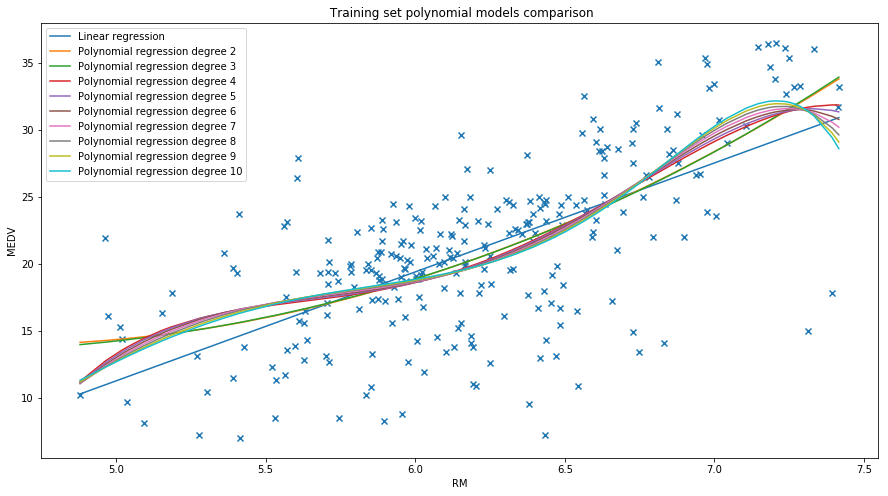

In [27]:

plt.figure(figsize = (15,8))
plt.scatter(X_poly_2[:,1], y, marker='x')


plt.plot(X_poly_1_o[:,1], X_poly_1_o.dot(theta_ne_1), label= 'Linear regression ')
plt.plot(X_poly_2_o[:,1], X_poly_2_o.dot(theta_ne_2), label= 'Polynomial regression degree 2')
plt.plot(X_poly_3_o[:,1], X_poly_3_o.dot(theta_ne_3), label = 'Polynomial regression degree 3')
plt.plot(X_poly_4_o[:,1], X_poly_4_o.dot(theta_ne_4), label = 'Polynomial regression degree 4')
plt.plot(X_poly_5_o[:,1], X_poly_5_o.dot(theta_ne_5), label = 'Polynomial regression degree 5')
plt.plot(X_poly_6_o[:,1], X_poly_6_o.dot(theta_ne_6), label = 'Polynomial regression degree 6')
plt.plot(X_poly_7_o[:,1], X_poly_7_o.dot(theta_ne_7), label = 'Polynomial regression degree 7')
plt.plot(X_poly_8_o[:,1], X_poly_8_o.dot(theta_ne_8), label = 'Polynomial regression degree 8')
plt.plot(X_poly_9_o[:,1], X_poly_9_o.dot(theta_ne_9), label = 'Polynomial regression degree 9')
plt.plot(X_poly_10_o[:,1], X_poly_10_o.dot(theta_ne_10), label = 'Polynomial regression degree 10')



plt.title(" Training set polynomial models comparison")
plt.xlabel(variable)
plt.ylabel(target_name)
plt.legend()
plt.show()

## Validation Set

In [28]:

X_validation = pd.DataFrame(boston_validation[variable])
y_validation = pd.DataFrame(boston_validation[target_name])

print(X_validation.shape, y_validation.shape)


(90, 1) (90, 1)


In [29]:
X_poly_validation_1 = np.c_[np.ones((X_validation.shape[0], 1)), X_validation]
X_poly_validation_2 = np.c_[np.ones((X_validation.shape[0], 1)), polynomial_features(X_validation, 2)]
X_poly_validation_3 = np.c_[np.ones((X_validation.shape[0], 1)), polynomial_features(X_validation, 3)]
X_poly_validation_4 = np.c_[np.ones((X_validation.shape[0], 1)), polynomial_features(X_validation, 4)]
X_poly_validation_5 = np.c_[np.ones((X_validation.shape[0], 1)), polynomial_features(X_validation, 5)]
X_poly_validation_6 = np.c_[np.ones((X_validation.shape[0], 1)), polynomial_features(X_validation, 6)]
X_poly_validation_7 = np.c_[np.ones((X_validation.shape[0], 1)), polynomial_features(X_validation, 7)]
X_poly_validation_8 = np.c_[np.ones((X_validation.shape[0], 1)), polynomial_features(X_validation, 8)]
X_poly_validation_9 = np.c_[np.ones((X_validation.shape[0], 1)), polynomial_features(X_validation, 9)]
X_poly_validation_10 = np.c_[np.ones((X_validation.shape[0], 1)), polynomial_features(X_validation, 10)]

In [30]:
'''
X_poly_test_2_o = X_poly_test_2[np.argsort(X_poly_test_2[:, :])]
X_poly_test_3_o = X_poly_test_3[np.argsort(X_poly_test_3[:, :])]
X_poly_test_4_o = X_poly_test_4[np.argsort(X_poly_test_4[:, :])]
X_poly_test_5_o = X_poly_test_5[np.argsort(X_poly_test_5[:, :])]
X_poly_test_6_o = X_poly_test_6[np.argsort(X_poly_test_6[:, :])]
X_poly_test_7_o = X_poly_test_7[np.argsort(X_poly_test_7[:, :])]
X_poly_test_8_o = X_poly_test_8[np.argsort(X_poly_test_8[:, :])]
X_poly_test_9_o = X_poly_test_9[np.argsort(X_poly_test_9[:, :])]
X_poly_test_10_o = X_poly_test_10[np.argsort(X_poly_test_10[:, :])]
''' 
srt_zip_1_validation = sorted(zip(X_validation.values, X_poly_validation_1.dot(theta_ne)))
X_1_validation, yhat_1_validation = zip(*srt_zip_1_validation)

srt_zip_2_validation = sorted(zip(X_validation.values, X_poly_validation_2.dot(theta_ne_2)))
X_2_validation, yhat_2_validation = zip(*srt_zip_2_validation)

srt_zip_3_validation = sorted(zip(X_validation.values, X_poly_validation_3.dot(theta_ne_3)))
X_3_validation, yhat_3_validation = zip(*srt_zip_3_validation)

srt_zip_4_validation = sorted(zip(X_validation.values, X_poly_validation_4.dot(theta_ne_4)))
X_4_validation, yhat_4_validation = zip(*srt_zip_4_validation)

srt_zip_5_validation = sorted(zip(X_validation.values, X_poly_validation_5.dot(theta_ne_5)))
X_5_validation, yhat_5_validation = zip(*srt_zip_5_validation)

srt_zip_6_validation = sorted(zip(X_validation.values, X_poly_validation_6.dot(theta_ne_6)))
X_6_validation, yhat_6_validation = zip(*srt_zip_6_validation)

srt_zip_7_validation = sorted(zip(X_validation.values, X_poly_validation_7.dot(theta_ne_7)))
X_7_validation, yhat_7_validation = zip(*srt_zip_7_validation)

srt_zip_8_validation = sorted(zip(X_validation.values, X_poly_validation_8.dot(theta_ne_8)))
X_8_validation, yhat_8_validation = zip(*srt_zip_8_validation)

srt_zip_9_validation = sorted(zip(X_validation.values, X_poly_validation_9.dot(theta_ne_9)))
X_9_validation, yhat_9_validation = zip(*srt_zip_9_validation)

srt_zip_10_validation = sorted(zip(X_validation.values, X_poly_validation_10.dot(theta_ne_10)))
X_10_validation, yhat_10_validation = zip(*srt_zip_10_validation)



In [31]:
#X_2_test
#yhat_2_test

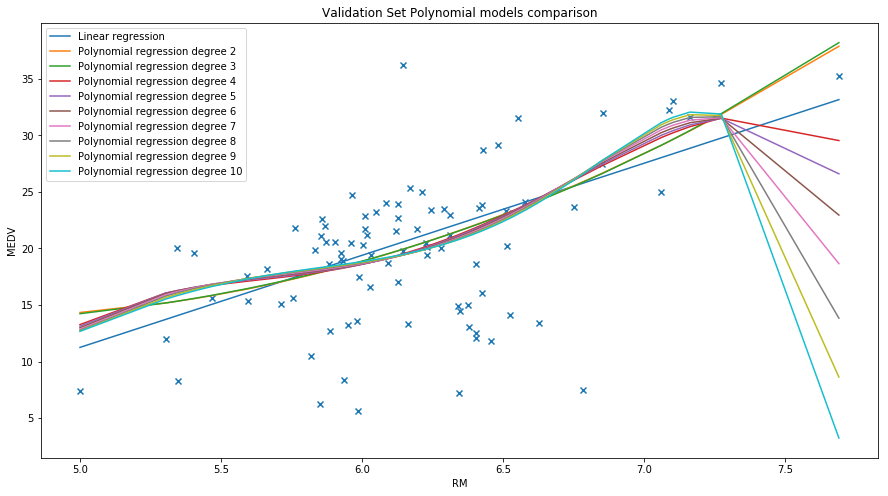

In [32]:


plt.figure(figsize = (15,8))
plt.scatter(X_poly_validation_2[:,1], y_validation, marker='x')

plt.plot(X_1_validation, yhat_1_validation, label= 'Linear regression ')
plt.plot(X_2_validation, yhat_2_validation, label= 'Polynomial regression degree 2')
plt.plot(X_3_validation, yhat_3_validation, label = 'Polynomial regression degree 3')
plt.plot(X_4_validation, yhat_4_validation, label = 'Polynomial regression degree 4')
plt.plot(X_5_validation, yhat_5_validation, label = 'Polynomial regression degree 5')
plt.plot(X_6_validation, yhat_6_validation, label = 'Polynomial regression degree 6')
plt.plot(X_7_validation, yhat_7_validation, label = 'Polynomial regression degree 7')
plt.plot(X_8_validation, yhat_8_validation, label = 'Polynomial regression degree 8')
plt.plot(X_9_validation, yhat_9_validation, label = 'Polynomial regression degree 9')
plt.plot(X_10_validation, yhat_10_validation, label = 'Polynomial regression degree 10')



plt.title("Validation Set Polynomial models comparison")
plt.xlabel(variable)
plt.ylabel(target_name)
plt.legend()
plt.show()

## Test Set

In [33]:
X_test = pd.DataFrame(boston_test[variable])
y_test = pd.DataFrame(boston_test[target_name])

In [34]:
X_poly_test_1 = np.c_[np.ones((X_test.shape[0], 1)), X_test]
X_poly_test_2 = np.c_[np.ones((X_test.shape[0], 1)), polynomial_features(X_test, 2)]
X_poly_test_3 = np.c_[np.ones((X_test.shape[0], 1)), polynomial_features(X_test, 3)]
X_poly_test_4 = np.c_[np.ones((X_test.shape[0], 1)), polynomial_features(X_test, 4)]
X_poly_test_5 = np.c_[np.ones((X_test.shape[0], 1)), polynomial_features(X_test, 5)]
X_poly_test_6 = np.c_[np.ones((X_test.shape[0], 1)), polynomial_features(X_test, 6)]
X_poly_test_7 = np.c_[np.ones((X_test.shape[0], 1)), polynomial_features(X_test, 7)]
X_poly_test_8 = np.c_[np.ones((X_test.shape[0], 1)), polynomial_features(X_test, 8)]
X_poly_test_9 = np.c_[np.ones((X_test.shape[0], 1)), polynomial_features(X_test, 9)]
X_poly_test_10 = np.c_[np.ones((X_test.shape[0], 1)), polynomial_features(X_test, 10)]

In [35]:
srt_zip_1_test = sorted(zip(X_test.values, X_poly_test_1.dot(theta_ne)))
X_1_test, yhat_1_test = zip(*srt_zip_1_test)

srt_zip_2_test = sorted(zip(X_test.values, X_poly_test_2.dot(theta_ne_2)))
X_2_test, yhat_2_test = zip(*srt_zip_2_test)

srt_zip_3_test = sorted(zip(X_test.values, X_poly_test_3.dot(theta_ne_3)))
X_3_test, yhat_3_test = zip(*srt_zip_3_test)

srt_zip_4_test = sorted(zip(X_test.values, X_poly_test_4.dot(theta_ne_4)))
X_4_test, yhat_4_test = zip(*srt_zip_4_test)

srt_zip_5_test = sorted(zip(X_test.values, X_poly_test_5.dot(theta_ne_5)))
X_5_test, yhat_5_test = zip(*srt_zip_5_test)

srt_zip_6_test = sorted(zip(X_test.values, X_poly_test_6.dot(theta_ne_6)))
X_6_test, yhat_6_test = zip(*srt_zip_6_test)

srt_zip_7_test = sorted(zip(X_test.values, X_poly_test_7.dot(theta_ne_7)))
X_7_test, yhat_7_test = zip(*srt_zip_7_test)

srt_zip_8_test = sorted(zip(X_test.values, X_poly_test_8.dot(theta_ne_8)))
X_8_test, yhat_8_test = zip(*srt_zip_8_test)

srt_zip_9_test = sorted(zip(X_test.values, X_poly_test_9.dot(theta_ne_9)))
X_9_test, yhat_9_test = zip(*srt_zip_9_test)

srt_zip_10_test = sorted(zip(X_test.values, X_poly_test_10.dot(theta_ne_10)))
X_10_test, yhat_10_test = zip(*srt_zip_10_test)



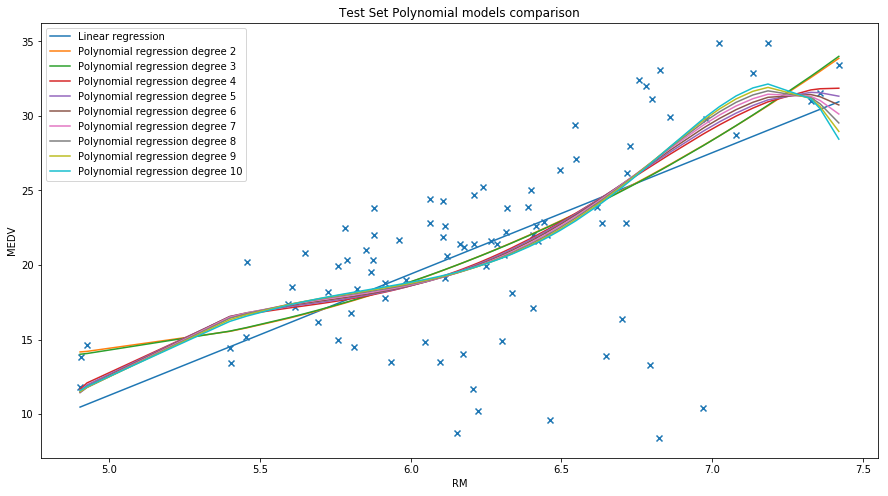

In [36]:


plt.figure(figsize = (15,8))
plt.scatter(X_poly_test_2[:,1], y_test, marker='x')

plt.plot(X_1_test, yhat_1_test, label= 'Linear regression ')
plt.plot(X_2_test, yhat_2_test, label= 'Polynomial regression degree 2')
plt.plot(X_3_test, yhat_3_test, label = 'Polynomial regression degree 3')
plt.plot(X_4_test, yhat_4_test, label = 'Polynomial regression degree 4')
plt.plot(X_5_test, yhat_5_test, label = 'Polynomial regression degree 5')
plt.plot(X_6_test, yhat_6_test, label = 'Polynomial regression degree 6')
plt.plot(X_7_test, yhat_7_test, label = 'Polynomial regression degree 7')
plt.plot(X_8_test, yhat_8_test, label = 'Polynomial regression degree 8')
plt.plot(X_9_test, yhat_9_test, label = 'Polynomial regression degree 9')
plt.plot(X_10_test, yhat_10_test, label = 'Polynomial regression degree 10')



plt.title("Test Set Polynomial models comparison")
plt.xlabel(variable)
plt.ylabel(target_name)
plt.legend()
plt.show()

## Evaluation of Polynomial models (Test set)

In [37]:
'''
def MSE(y,yhat):
  
    m = y.shape[0]
    z= 1/(2*m)
    B= yhat - y
    Bt=B.T
    J= z * (Bt.dot(B))
    return(J[0])
    '''

'\ndef MSE(y,yhat):\n  \n    m = y.shape[0]\n    z= 1/(2*m)\n    B= yhat - y\n    Bt=B.T\n    J= z * (Bt.dot(B))\n    return(J[0])\n    '

In [38]:
def MSE(y,yhat):
    m = y.shape[0]
   
    J = 1/(2*m)*((yhat-y).T.dot(yhat-y))
    return(J[0])

In [39]:
np.array(yhat_2_test).shape
#print("y_test: ", y_test.values)
print(np.array(yhat_2_test).reshape(-1,1).shape)
#print("y_hat: ",np.array(yhat_2_test).reshape(-1,1))

(91, 1)


In [40]:
MSE_training_1 = MSE(y,np.array(X_poly_1.dot(theta_ne_1)).reshape(-1,1))
MSE_training_2 = MSE(y,np.array(X_poly_2.dot(theta_ne_2)).reshape(-1,1))
MSE_training_3 = MSE(y,np.array(X_poly_3.dot(theta_ne_3)).reshape(-1,1))
MSE_training_4 = MSE(y,np.array(X_poly_4.dot(theta_ne_4)).reshape(-1,1))
MSE_training_5 = MSE(y,np.array(X_poly_5.dot(theta_ne_5)).reshape(-1,1))
MSE_training_6 = MSE(y,np.array(X_poly_6.dot(theta_ne_6)).reshape(-1,1))
MSE_training_7 = MSE(y,np.array(X_poly_7.dot(theta_ne_7)).reshape(-1,1))
MSE_training_8 = MSE(y,np.array(X_poly_8.dot(theta_ne_8)).reshape(-1,1))
MSE_training_9 = MSE(y,np.array(X_poly_9.dot(theta_ne_9)).reshape(-1,1))
MSE_training_10 = MSE(y,np.array(X_poly_10.dot(theta_ne_10)).reshape(-1,1))

In [41]:
MSE_validation_1 = MSE(y_validation.values,np.array(X_poly_validation_1.dot(theta_ne)).reshape(-1,1))
MSE_validation_2 = MSE(y_validation.values,np.array(X_poly_validation_2.dot(theta_ne_2)).reshape(-1,1))
MSE_validation_3 = MSE(y_validation.values,np.array(X_poly_validation_3.dot(theta_ne_3)).reshape(-1,1))
MSE_validation_4 = MSE(y_validation.values,np.array(X_poly_validation_4.dot(theta_ne_4)).reshape(-1,1))
MSE_validation_5 = MSE(y_validation.values,np.array(X_poly_validation_5.dot(theta_ne_5)).reshape(-1,1))
MSE_validation_6 = MSE(y_validation.values,np.array(X_poly_validation_6.dot(theta_ne_6)).reshape(-1,1))
MSE_validation_7 = MSE(y_validation.values,np.array(X_poly_validation_7.dot(theta_ne_7)).reshape(-1,1))
MSE_validation_8 = MSE(y_validation.values,np.array(X_poly_validation_8.dot(theta_ne_8)).reshape(-1,1))
MSE_validation_9 = MSE(y_validation.values,np.array(X_poly_validation_9.dot(theta_ne_9)).reshape(-1,1))
MSE_validation_10 = MSE(y_validation.values,np.array(X_poly_validation_10.dot(theta_ne_10)).reshape(-1,1))


In [42]:
MSE_test_1 = MSE(y_test.values,np.array(X_poly_test_1.dot(theta_ne)).reshape(-1,1))
MSE_test_2 = MSE(y_test.values,np.array(X_poly_test_2.dot(theta_ne_2)).reshape(-1,1))
MSE_test_3 = MSE(y_test.values,np.array(X_poly_test_3.dot(theta_ne_3)).reshape(-1,1))
MSE_test_4 = MSE(y_test.values,np.array(X_poly_test_4.dot(theta_ne_4)).reshape(-1,1))
MSE_test_5 = MSE(y_test.values,np.array(X_poly_test_5.dot(theta_ne_5)).reshape(-1,1))
MSE_test_6 = MSE(y_test.values,np.array(X_poly_test_6.dot(theta_ne_6)).reshape(-1,1))
MSE_test_7 = MSE(y_test.values,np.array(X_poly_test_7.dot(theta_ne_7)).reshape(-1,1))
MSE_test_8 = MSE(y_test.values,np.array(X_poly_test_8.dot(theta_ne_8)).reshape(-1,1))
MSE_test_9 = MSE(y_test.values,np.array(X_poly_test_9.dot(theta_ne_9)).reshape(-1,1))
MSE_test_10 = MSE(y_test.values,np.array(X_poly_test_10.dot(theta_ne_10)).reshape(-1,1))

In [43]:
print("J_train 2: {}".format(MSE_training_2[0]))
print("J_train 3: {}".format(MSE_training_3[0]))
print("J_train 4: {}".format(MSE_training_4[0]))
print("J_train 5: {}".format(MSE_training_5[0]))
print("J_train 6: {}".format(MSE_training_6[0]))
print("J_train 7: {}".format(MSE_training_7[0]))
print("J_train 8: {}".format(MSE_training_8[0]))
print("J_train 9: {}".format(MSE_training_9[0]))
print("J_train 10: {}".format(MSE_training_10[0]))

J_train 2: 10.942643656693727
J_train 3: 10.942044441597679
J_train 4: 10.809898412494057
J_train 5: 10.767254060394844
J_train 6: 10.718736111127132
J_train 7: 10.668423823311924
J_train 8: 10.6203761137273
J_train 9: 10.577747686344335
J_train 10: 10.542790157052154


In [44]:
print("J_validation 2: {}".format(MSE_validation_2[0]))
print("J_validation 3: {}".format(MSE_validation_3[0]))
print("J_validation 4: {}".format(MSE_validation_4[0]))
print("J_validation 5: {}".format(MSE_validation_5[0]))
print("J_validation 6: {}".format(MSE_validation_6[0]))
print("J_validation 7: {}".format(MSE_validation_7[0]))
print("J_validation 8: {}".format(MSE_validation_8[0]))
print("J_validation 9: {}".format(MSE_validation_9[0]))
print("J_validation 10: {}".format(MSE_validation_10[0]))

J_validation 2: 16.019384117932844
J_validation 3: 15.99518164822232
J_validation 4: 16.17527471624933
J_validation 5: 16.38337447093774
J_validation 6: 16.764640969390666
J_validation 7: 17.39675972339322
J_validation 8: 18.349733809781878
J_validation 9: 19.672748440626812
J_validation 10: 21.366926601294356


In [45]:
print("J_test 2: {}".format(MSE_test_2[0]))
print("J_test 3: {}".format(MSE_test_3[0]))
print("J_test 4: {}".format(MSE_test_4[0]))
print("J_test 5: {}".format(MSE_test_5[0]))
print("J_test 6: {}".format(MSE_test_6[0]))
print("J_test 7: {}".format(MSE_test_7[0]))
print("J_test 8: {}".format(MSE_test_8[0]))
print("J_test 9: {}".format(MSE_test_9[0]))
print("J_test 10: {}".format(MSE_test_10[0]))

J_test 2: 12.605435126217488
J_test 3: 12.581525485068383
J_test 4: 12.663683876263754
J_test 5: 12.68434160031008
J_test 6: 12.704088465059543
J_test 7: 12.721946924619425
J_test 8: 12.737426163434025
J_test 9: 12.750698458596057
J_test 10: 12.76221953471113


In [46]:
d = [1,2,3,4,5,6,7,8,9,10]
MSE_validation_values = [MSE_validation_1,MSE_validation_2, MSE_validation_3, MSE_validation_4, MSE_validation_5, MSE_validation_6, MSE_validation_7,MSE_validation_8, MSE_validation_9,MSE_validation_10]
MSE_train_values = [MSE_training_1,MSE_training_2, MSE_training_3, MSE_training_4, MSE_training_5, MSE_training_6, MSE_training_7,MSE_training_8, MSE_training_9,MSE_training_10]
MSE_test_values = [MSE_test_1,MSE_test_2, MSE_test_3, MSE_test_4, MSE_test_5, MSE_test_6, MSE_test_7,MSE_test_8, MSE_test_9,MSE_test_10]


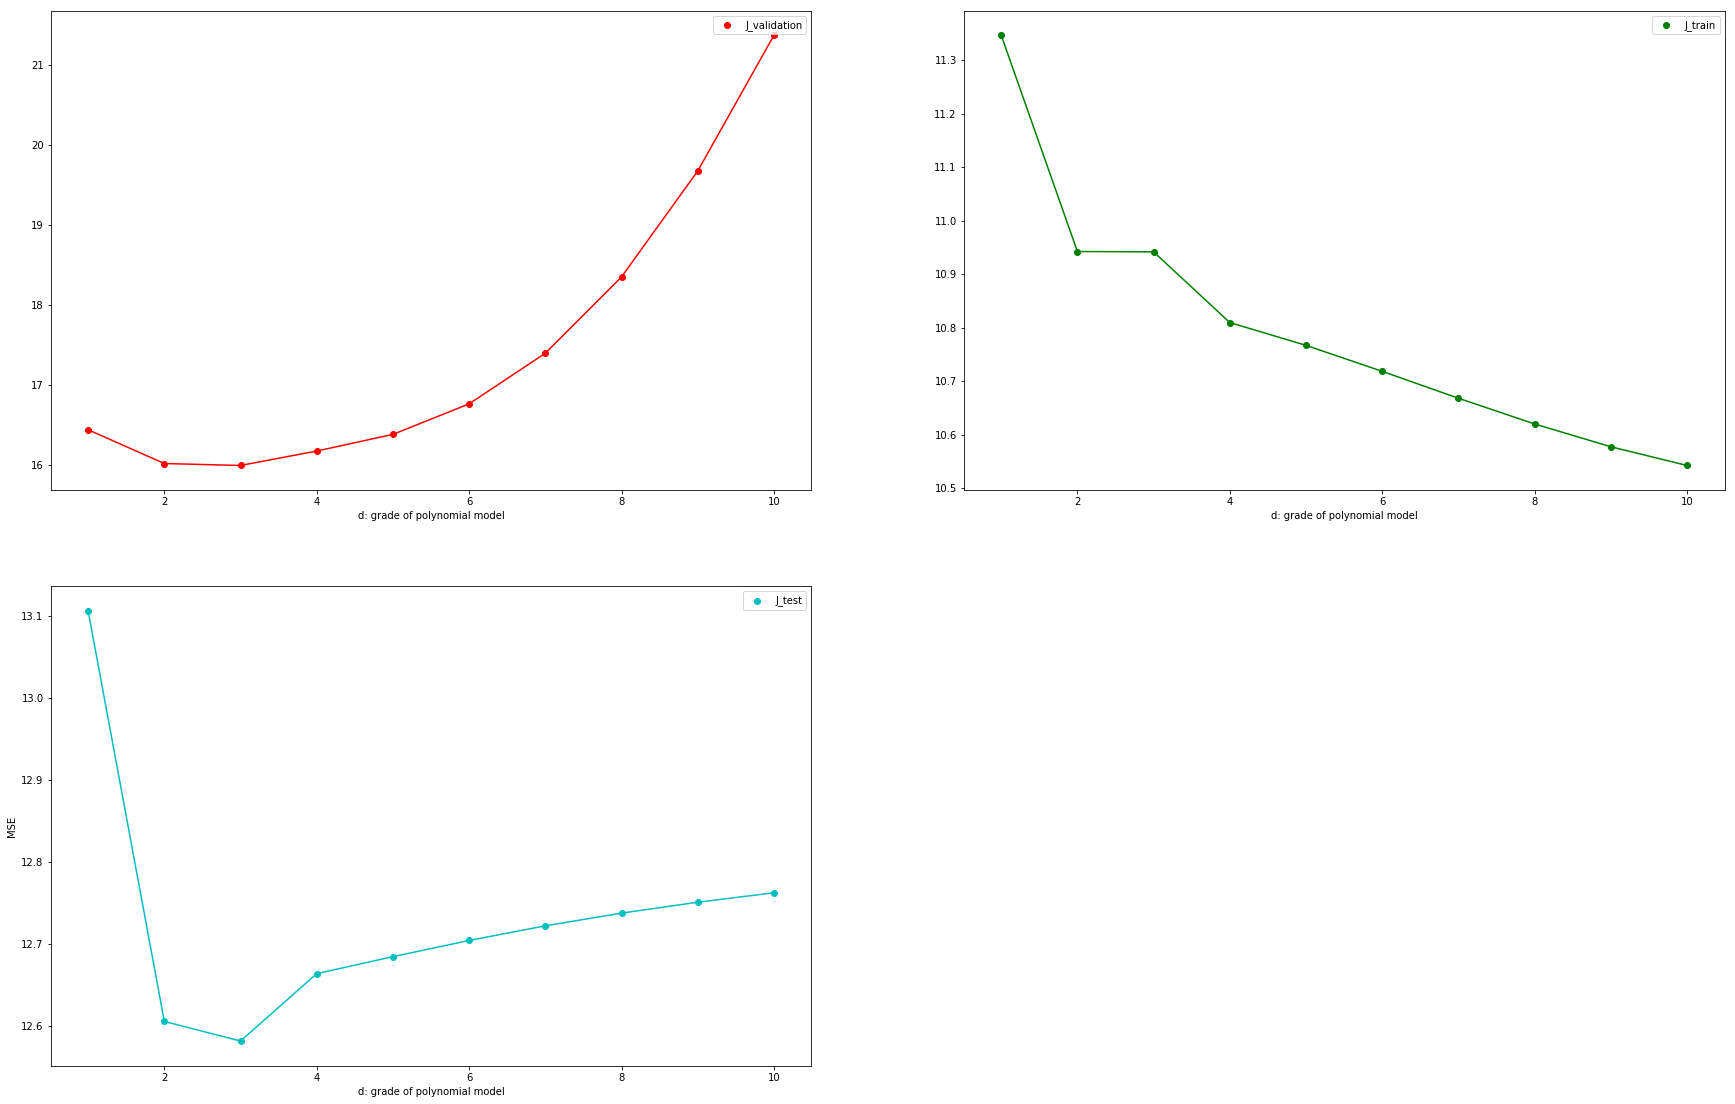

<Figure size 432x288 with 0 Axes>

In [47]:

fig=plt.figure(figsize= (30,30))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax1.plot(d, MSE_validation_values, c= 'r')
ax1.scatter(d, MSE_validation_values, c= 'r', label = 'J_validation')
ax2.plot(d, MSE_train_values, c= 'g')
ax2.scatter(d, MSE_train_values, c= 'g', label = 'J_train')
ax1.set_xlabel("d: grade of polynomial model")
ax2.set_xlabel("d: grade of polynomial model")
plt.ylabel("MSE")
ax1.legend()
ax2.legend()

ax3.plot(d, MSE_test_values, c= 'c')
ax3.scatter(d, MSE_test_values, c= 'c', label = 'J_test')
ax3.set_xlabel("d: grade of polynomial model")
ax3.legend()






plt.show()
plt.savefig("Train,Validation and Test Set MSE.png")

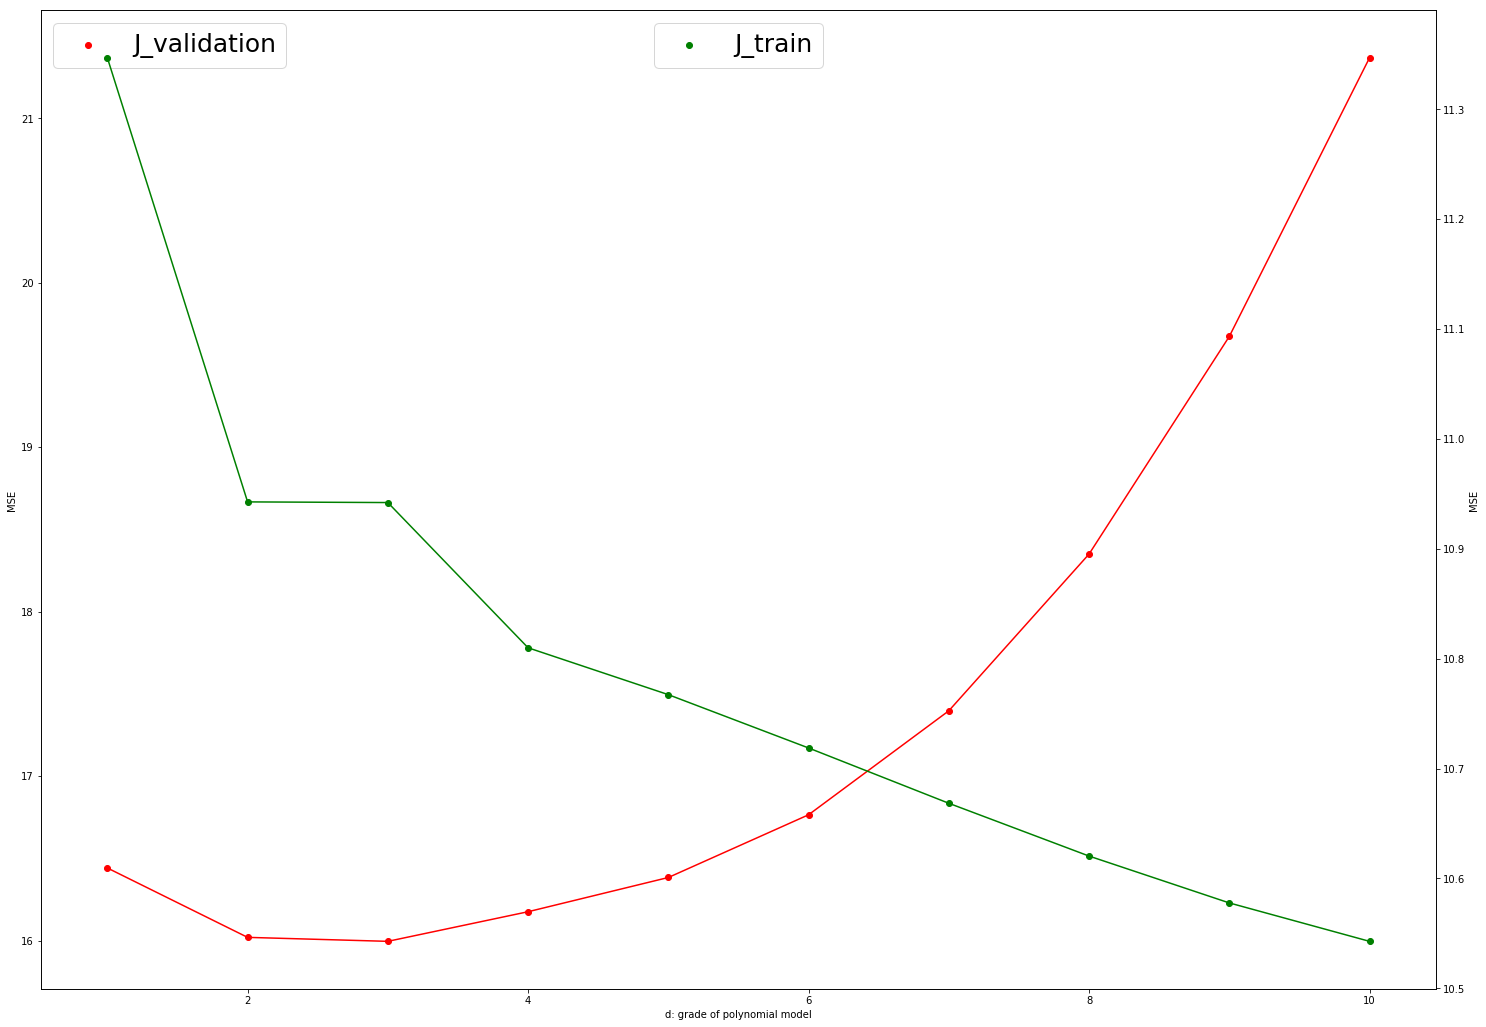

<Figure size 432x288 with 0 Axes>

In [48]:

fig =plt.figure(figsize=(25, 18))

ax1 = fig.add_subplot(111)

ax2 = ax1.twinx()
ax1.plot(d, MSE_validation_values, c= 'r')
ax1.scatter(d, MSE_validation_values, c= 'r', label = 'J_validation')
ax2.plot(d, MSE_train_values, c= 'g')
ax2.scatter(d, MSE_train_values, c= 'g', label = 'J_train')
ax1.set_xlabel("d: grade of polynomial model")
ax1.set_ylabel("MSE")
ax2.set_xlabel("d: grade of polynomial model")
ax2.set_ylabel("MSE")

#ax2.plot(d, MSE_test_values, c= 'c')
#ax2.scatter(d, MSE_test_values, c= 'c', label = 'J_test')
ax1.legend(fontsize = 25)
ax2.legend(loc = "upper center", fontsize = 25)
plt.show()
plt.savefig("Train and Validation Set MSE.png")


## Regularization and MSE behaviour w.r.t $ \lambda $ parameter variation

In [49]:
def gradientDescent(X, y, theta=np.zeros((2,1)), alpha=0.01, num_iters=1500):
    m = y.size
    J_history = np.zeros(num_iters)
   # theta_history = np.zeros((num_iters,2))
    thetas=[] #sarà una lista di vettori che contengono i parametri
    sample_theta=200
    for iter in np.arange(num_iters):
        h = X.dot(theta)

        # ! simoultaneusly update all the parameters 
        # vectorized implementation
        theta = theta - alpha*(1/m)*(X.T.dot(h-y))
        J_history[iter] = computeCost(X, y, theta)
        if(iter % sample_theta == 0): #serve per campionare i valori di theta quando iter è divisibile per sample_theta, entro nell'if
           # theta_history[iter][0] = theta[0]
            #theta_history[iter][1] = theta[1]
            thetas.append(theta.ravel()) 
    return(theta.ravel(), J_history , thetas )

In [50]:
def computeCost(X,Y,theta= np.zeros((2,1))):
    J=0;
    m = Y.shape[0]
    A= X.dot(theta)
    z= 1/(2*m)
    B= A - Y
    Bt=B.T
    J= z * (Bt.dot(B))
    return(J[0])

In [51]:
from sklearn.utils import shuffle
#boston = shuffle(boston)
#boston.reindex(np.random.permutation(boston.index))
boston = X_wo_tmp_iqr
print(boston.shape)
boston = boston.sample(frac = 1, random_state = 5).reset_index(drop=True)
n_train_idx =int(boston.shape[0]*0.6)
n_validation_idx =int(boston.shape[0]*8)
boston_train = boston[:n_train_idx]
boston_validation = boston[n_train_idx+1:n_validation_idx]
boston_test = boston[n_validation_idx+1:]

X = np.c_[np.ones((boston_train.shape[0],1)), boston_train[variable]]
y = np.array(boston_train[target_name]).reshape(-1,1)

X_val = np.c_[np.ones((boston_validation.shape[0],1)), boston_validation[variable]]
y_val = np.array(boston_validation[target_name]).reshape(-1,1)

print(X_val.shape)

(457, 2)
(182, 2)


In [52]:
X_poly = pd.DataFrame(X[:,1], columns = [variable])
X_poly_1 = np.c_[np.ones((X_poly.shape[0], 1)), X_poly]
X_poly_2 = np.c_[np.ones((X_poly.shape[0], 1)), polynomial_features(X_poly, 2)]
X_poly_3 = np.c_[np.ones((X_poly.shape[0], 1)), polynomial_features(X_poly, 3)]
X_poly_4 = np.c_[np.ones((X_poly.shape[0], 1)), polynomial_features(X_poly, 4)]
X_poly_5 = np.c_[np.ones((X_poly.shape[0], 1)), polynomial_features(X_poly, 5)]
X_poly_6 = np.c_[np.ones((X_poly.shape[0], 1)), polynomial_features(X_poly, 6)]
X_poly_7 = np.c_[np.ones((X_poly.shape[0], 1)), polynomial_features(X_poly, 7)]
X_poly_8 = np.c_[np.ones((X_poly.shape[0], 1)), polynomial_features(X_poly, 8)]
X_poly_9 = np.c_[np.ones((X_poly.shape[0], 1)), polynomial_features(X_poly, 9)]
X_poly_10 = np.c_[np.ones((X_poly.shape[0], 1)), polynomial_features(X_poly, 10)]

X_poly_val = pd.DataFrame(X_val[:,1], columns = [variable])
X_poly_6_val = np.c_[np.ones((X_poly_val.shape[0], 1)), polynomial_features(X_poly_val, 6)]






In [53]:
def MSEReg(y,yhat, theta,lambda_reg = 0.0):
    m = y.shape[0]
    
    # vectorized implementation
    J = 1/(2*m)*((yhat-y).T.dot(yhat-y)) + (lambda_reg/(2*m))*(theta[1:].T.dot(theta[1:]))
    end = time.time()
    eta = end-start
    return J[0][0]

In [54]:
def computeCostVectorizedReg(X, y, lambda_reg = 0.0, theta=np.zeros((X.shape[1], 1))):
    m = y.size

    start = time.time()
    h = X.dot(theta)
    
    # vectorized implementation
    J = (1/(2*m))*((h-y).T.dot(h-y)) + (lambda_reg/(2*m))*(theta[1:].T.dot(theta[1:]))
    end = time.time()
    eta = end-start
    return J[0][0], eta 

In [55]:
def gradientDescentVectorizedReg(X, y, lambda_reg, theta, alpha, num_iters, early ):
    m = y.size
    J_history = np.zeros(num_iters)

    for iter in np.arange(num_iters):
        h = X.dot(theta)
        
        # ! simoultaneusly update all the parameters 
        # vectorized implementation
        theta = theta - (alpha*(1/m)*(X.T.dot(h-y)) + ((alpha*lambda_reg)/m) * np.r_[[[0]], theta[1:].reshape(-1,1)])
        J_history[iter], _ = computeCostVectorizedReg(X, y, lambda_reg, theta)
        
        # early stopping
        if (early == True) & (J_history[iter] == J_history[iter-1]):
            break
            
    return(theta.ravel(), J_history[J_history != 0])

In [56]:
def featureScaling(X):
    X_scaled = X
    
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    maxima = np.amax(X, axis = 0)
    minima = np.amin(X, axis = 0)
    
    for j in range(X.shape[1]):
        X_scaled[:,j] = (X[:,j]-mu[j])/sigma[j]
        #X_scaled[:,j] = (X[:,j]-mu[j])/(maxima[j] - minima[j])
    
    return X_scaled, mu, sigma, maxima, minima

In [57]:
X_scaled_poly_1, _ , _ , _ , _ = featureScaling(X_poly_1[:, 1:])
X_scaled_poly_2, _ , _ , _ , _ = featureScaling(X_poly_2[:, 1:])
X_scaled_poly_3, _ , _ , _ , _ = featureScaling(X_poly_3[:, 1:])
X_scaled_poly_4, _ , _ , _ , _ = featureScaling(X_poly_4[:, 1:])
X_scaled_poly_5, _ , _ , _ , _ = featureScaling(X_poly_5[:, 1:])
X_scaled_poly_6, _ , _ , _ , _ = featureScaling(X_poly_6[:, 1:])
X_scaled_poly_7, _ , _ , _ , _ = featureScaling(X_poly_7[:, 1:])
X_scaled_poly_8, _ , _ , _ , _ = featureScaling(X_poly_8[:, 1:])
X_scaled_poly_9, _ , _ , _ , _ = featureScaling(X_poly_9[:, 1:])
X_scaled_poly_10, _ , _ , _ , _ = featureScaling(X_poly_10[:, 1:])


X_scaled_validation_poly_6, _ , _ , _ , _ = featureScaling(X_poly_6_val[:, 1:])




In [58]:
X_scaled_poly_1 = np.c_[np.ones((X_scaled_poly_1.shape[0], 1)), X_scaled_poly_1]
X_scaled_poly_2 = np.c_[np.ones((X_scaled_poly_2.shape[0], 1)), X_scaled_poly_2]
X_scaled_poly_3 = np.c_[np.ones((X_scaled_poly_3.shape[0], 1)), X_scaled_poly_3]
X_scaled_poly_4 = np.c_[np.ones((X_scaled_poly_4.shape[0], 1)), X_scaled_poly_4]
X_scaled_poly_5 = np.c_[np.ones((X_scaled_poly_5.shape[0], 1)), X_scaled_poly_5]
X_scaled_poly_6 = np.c_[np.ones((X_scaled_poly_6.shape[0], 1)), X_scaled_poly_6]
X_scaled_poly_7 = np.c_[np.ones((X_scaled_poly_7.shape[0], 1)), X_scaled_poly_7]
X_scaled_poly_8 = np.c_[np.ones((X_scaled_poly_8.shape[0], 1)), X_scaled_poly_8]
X_scaled_poly_9 = np.c_[np.ones((X_scaled_poly_9.shape[0], 1)), X_scaled_poly_9]
X_scaled_poly_10 = np.c_[np.ones((X_scaled_poly_10.shape[0], 1)), X_scaled_poly_10]


X_scaled_validation_poly_6 = np.c_[np.ones((X_scaled_validation_poly_6.shape[0], 1)), X_scaled_validation_poly_6]

In [59]:
lambda_vect = [0 ,   0.08 , 0.1 , 0.5, 1 , 1.5 , 2 , 2.5 , 3 , 3.5 ,4 , 5, 6,7, 8,9, 10 , 11 ,12 ,13 , 14]
theta_poly_6_reg = []
for i in lambda_vect:
    lambda_reg = i
    print(lambda_reg)
    alpha = 0.3
    num_iters = 9000
    early = False
    theta_poly_6 = np.zeros((X_scaled_poly_6.shape[1], 1))
    theta_poly_6_opt, J_poly_6  = gradientDescentVectorizedReg(X_scaled_poly_6, y, lambda_reg = lambda_reg, theta = theta_poly_6, alpha=alpha, num_iters=num_iters, early = early)
    print(theta_poly_6_opt)
    theta_poly_6_reg.append(theta_poly_6_opt)

    

0
[20.74562044 -4.29341807  1.13752252  4.29056155  4.72212611  2.09479427
 -3.81061571]
0.08
[20.74562044 -3.02411493  0.93866998  3.25105417  3.60729774  1.77733982
 -2.38528355]
0.1
[20.74562044 -2.78971604  0.90177347  3.05926893  3.40194072  1.7190381
 -2.1229323 ]
0.5
[ 2.07456204e+01 -8.59692160e-01  5.96494298e-01  1.48766742e+00
  1.72520108e+00  1.24514168e+00  1.00246975e-02]
1
[20.74562044 -0.34397094  0.51962037  1.07937843  1.28998082  1.11921618
  0.54880182]
1.5
[20.74562044 -0.14919191  0.49627189  0.9335488   1.13181592  1.06923437
  0.73347366]
2
[20.74562044 -0.04308576  0.48764716  0.85964269  1.0493198   1.03996689
  0.82212904]
2.5
[20.74562044  0.02594475  0.48493219  0.8153949   0.99810727  1.01942583
  0.87159712]
3
[20.74562044  0.07578425  0.48506363  0.78619471  0.96286814  1.00348956
  0.90143559]
3.5
[20.74562044  0.11428941  0.48670806  0.76565216  0.93690714  0.99034881
  0.92016284]
4
[20.74562044  0.1454651   0.48919909  0.75053154  0.91682919  0.9790

In [60]:
'''
lambda_vect = [0 ,   0.08 , 0.1 , 0.5, 1 , 1.5 , 2 , 2.5 , 3 , 3.55, 8]
theta_poly_3_reg = []
for i in lambda_vect:
    lambda_reg = i
    print(lambda_reg)
    alpha = 0.4
    num_iters = 8000
    early = False
    theta_poly_3 = np.zeros((X_scaled_poly_3.shape[1], 1))
    theta_poly_3_opt, J_poly_3, _ = gradientDescentVectorizedReg(X_scaled_poly_3, y, lambda_reg = lambda_reg, theta = theta_poly_3, alpha=alpha, num_iters=num_iters, early = early)
    print(theta_poly_3_opt)
    theta_poly_3_reg.append(theta_poly_3_opt)
    '''

'\nlambda_vect = [0 ,   0.08 , 0.1 , 0.5, 1 , 1.5 , 2 , 2.5 , 3 , 3.55, 8]\ntheta_poly_3_reg = []\nfor i in lambda_vect:\n    lambda_reg = i\n    print(lambda_reg)\n    alpha = 0.4\n    num_iters = 8000\n    early = False\n    theta_poly_3 = np.zeros((X_scaled_poly_3.shape[1], 1))\n    theta_poly_3_opt, J_poly_3, _ = gradientDescentVectorizedReg(X_scaled_poly_3, y, lambda_reg = lambda_reg, theta = theta_poly_3, alpha=alpha, num_iters=num_iters, early = early)\n    print(theta_poly_3_opt)\n    theta_poly_3_reg.append(theta_poly_3_opt)\n    '

In [61]:
print(len(y))

274


In [62]:
MSE_values_train_reg = []
for i in range(0, len(theta_poly_6_reg )):
    MSE_training_reg = MSE(y,np.array(X_scaled_poly_6.dot(theta_poly_6_reg[i])).reshape(-1,1))
    MSE_values_train_reg.append(MSE_training_reg)
    
MSE_values_train_reg



[array([11.16313736]),
 array([11.16976748]),
 array([11.17112137]),
 array([11.18374688]),
 array([11.18752215]),
 array([11.18899269]),
 array([11.18982475]),
 array([11.19039937]),
 array([11.19084843]),
 array([11.19122877]),
 array([11.19156839]),
 array([11.19217943]),
 array([11.19274145]),
 array([11.19327687]),
 array([11.19379509]),
 array([11.19430036]),
 array([11.19479475]),
 array([11.19527941]),
 array([11.19575503]),
 array([11.19622218]),
 array([11.19668134])]

In [63]:
print(X_poly_validation_6.shape)
print(X_scaled_validation_poly_6.shape)

(90, 7)
(182, 7)


In [64]:
MSE_values_validation_reg = []
for i in range(0, len(theta_poly_6_reg )):
    MSE_validation_reg = MSE(y_val ,np.array(X_scaled_validation_poly_6.dot(theta_poly_6_reg[i])).reshape(-1,1))
    MSE_values_validation_reg.append(MSE_validation_reg)
    
indexMin = np.argmin(np.array(MSE_values_validation_reg))
print(indexMin)
print(MSE_values_validation_reg)

5
[array([14.22767605]), array([14.20167607]), array([14.19700089]), array([14.16107972]), array([14.1540935]), array([14.15311848]), array([14.15366502]), array([14.15475933]), array([14.15607299]), array([14.15746757]), array([14.15887676]), array([14.1616181]), array([14.16417379]), array([14.16651247]), array([14.16863387]), array([14.17054905]), array([14.17227297]), array([14.17382141]), array([14.17520964]), array([14.17645193]), array([14.17756136])]


In [65]:
'''
MSE_values_train_reg = []
for i in range(0, len(theta_poly_3_reg )):
    MSE_training_reg = MSE(y,np.array(X_poly_3.dot(theta_poly_3_reg[i])).reshape(-1,1))
    MSE_values_train_reg.append(MSE_training_reg)
    
MSE_values_train_reg


MSE_values_validation_reg = []
for i in range(0, len(theta_poly_3_reg )):
    MSE_validation_reg = MSE(y_validation.values ,np.array(X_poly_validation_3.dot(theta_poly_3_reg[i])).reshape(-1,1))
    MSE_values_validation_reg.append(MSE_validation_reg)
    
MSE_values_validation_reg


MSE_values_test_reg = []
for i in range(0, len(theta_poly_3_reg )):
    MSE_test_reg = MSE(y_test.values ,np.array(X_poly_test_3.dot(theta_poly_3_reg[i])).reshape(-1,1))
    MSE_values_test_reg.append(MSE_test_reg)
    
MSE_values_test_reg
'''

'\nMSE_values_train_reg = []\nfor i in range(0, len(theta_poly_3_reg )):\n    MSE_training_reg = MSE(y,np.array(X_poly_3.dot(theta_poly_3_reg[i])).reshape(-1,1))\n    MSE_values_train_reg.append(MSE_training_reg)\n    \nMSE_values_train_reg\n\n\nMSE_values_validation_reg = []\nfor i in range(0, len(theta_poly_3_reg )):\n    MSE_validation_reg = MSE(y_validation.values ,np.array(X_poly_validation_3.dot(theta_poly_3_reg[i])).reshape(-1,1))\n    MSE_values_validation_reg.append(MSE_validation_reg)\n    \nMSE_values_validation_reg\n\n\nMSE_values_test_reg = []\nfor i in range(0, len(theta_poly_3_reg )):\n    MSE_test_reg = MSE(y_test.values ,np.array(X_poly_test_3.dot(theta_poly_3_reg[i])).reshape(-1,1))\n    MSE_values_test_reg.append(MSE_test_reg)\n    \nMSE_values_test_reg\n'

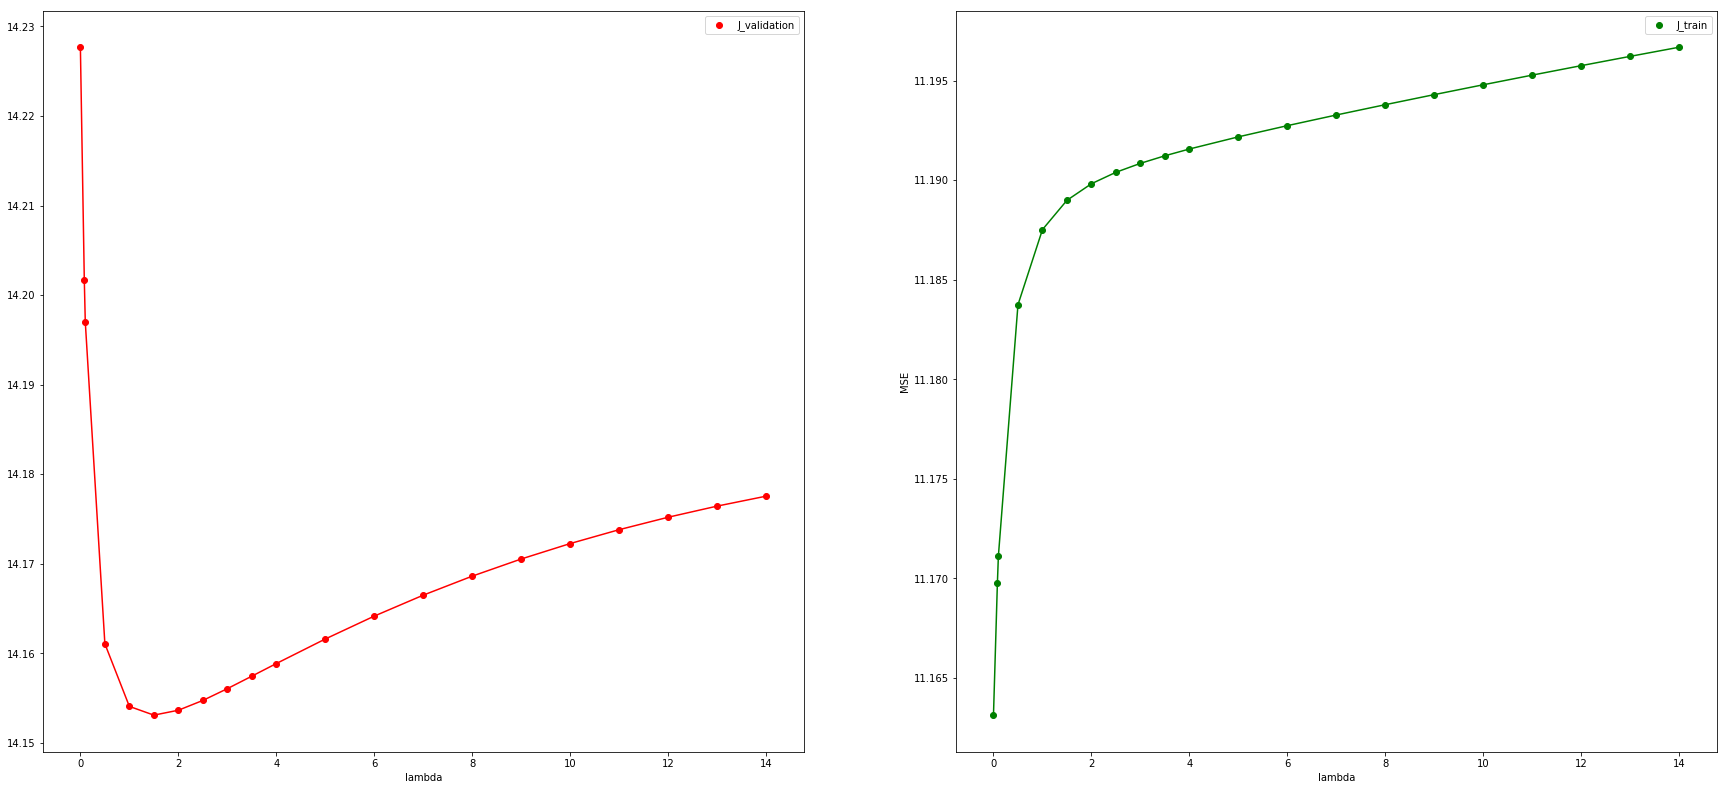

In [66]:

fig=plt.figure(figsize= (30,30))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

ax1.plot(lambda_vect,MSE_values_validation_reg, c= 'r')
ax1.scatter(lambda_vect,MSE_values_validation_reg, c= 'r', label = 'J_validation')
ax2.plot(lambda_vect,MSE_values_train_reg, c= 'g')
ax2.scatter(lambda_vect,MSE_values_train_reg , c= 'g', label = 'J_train')
ax1.set_xlabel("lambda")
ax2.set_xlabel("lambda")
plt.ylabel("MSE")
ax1.legend()
ax2.legend()


plt.show()